# THIS CODE IS NOT COMPLETE AND WAS EDITED AND PARTS WHERE DELETED THAT WHERE PART OF THE PROCESS. THIS ARE JUST THE REST OF THE SNIPPETS THAT WHERE USED

In [2]:
import os
import re
import itertools

import pandas as pd
import seaborn as sns
from exif import Image

In [3]:
directories = [
    file for file in os.walk(os.path.expanduser("~/Documents/Central/Data/Images"))
]

In [4]:
files_with_path = []
for path, folders, files in directories:
    files_with_path.append([f"{path}/{file}" for file in files])
files_with_path = list(itertools.chain(*files_with_path))

In [4]:
def normalize_jpg_file_ending():
    renamed = 0

    for file in files_with_path:
        try:
            file_path, ending = file.split(".")
        except Exception as e:
            print(str(e))
            print(file)
            continue
        if ending in ["JPG", "jpeg"]:
            renamed += 1
            os.rename(file, file_path + ".jpg")

    print(renamed)

In [5]:
file_endings = [file.split(".")[-1] for file in files_with_path]

<Axes: ylabel='count'>

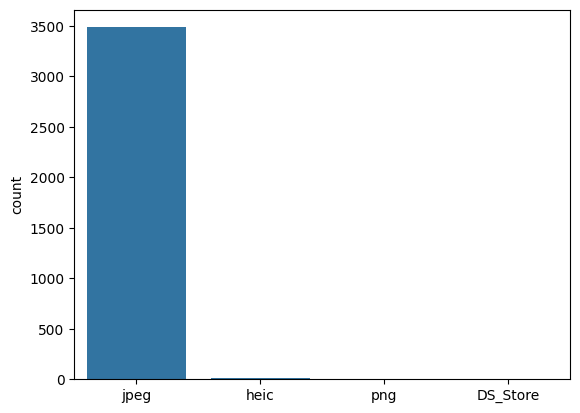

In [6]:
counts = pd.Series(file_endings).value_counts()
sns.countplot(x=file_endings, order=counts.index)

In [ ]:
exif_informations = []
for file in files_with_path:
    img = None
    with open(file, "rb") as img_file:
        try:
            img = Image(img_file)
        except Exception as e:
            pass
    if img is None:
        continue
    if img.has_exif:
        infos = {"file_name": file}
        for key in img.list_all():
            try:
                infos[key] = img[key]
            except Exception as e:
                pass
        exif_informations.append(infos)

exif_df = pd.DataFrame(exif_informations)

In [ ]:
exif_df.head()

In [9]:
exif_df.to_csv("exif.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data to only include rows where 'datetime' is None
df_filtered_na = exif_df[exif_df["datetime"].isna()]
df_filtered_not_na = exif_df[~exif_df["datetime"].isna()]

# Extract the year from the 'file_name' column
df_filtered_na["year"] = df_filtered_na["file_name"].apply(lambda x: x.split("/")[-2])
df_filtered_not_na["year"] = df_filtered_not_na["file_name"].apply(
    lambda x: x.split("/")[-2]
)

# Calculate the counts for each year
counts_na = df_filtered_na["year"].value_counts().reset_index(name="counts_na")
counts_not_na = (
    df_filtered_not_na["year"].value_counts().reset_index(name="counts_not_na")
)

# Merge the counts
merged_counts = pd.merge(counts_na, counts_not_na, on="year")

# Create a bar chart with two bars per year
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_counts.melt(id_vars="year", var_name="Existence", value_name="counts"),
    x="year",
    y="counts",
    hue="Existence",
)

plt.title("Count of files by year, divided by existence of datetime")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Existence", loc="upper right")
plt.show()

In [95]:
directories = [file for file in os.walk(os.path.expanduser("~/Pictures/0_Yearly"))]
files_with_path = []
for path, folders, files in directories:
    files_with_path.append([f"{path}/{file}" for file in files])
files_with_path = list(itertools.chain(*files_with_path))

In [96]:
import re

with_eight_digits = list(
    filter(lambda s: re.search(r"\d{8}[_-]\d{4,}", s), files_with_path)
)

correct_format = list(
    filter(
        lambda s: re.search(r"(\d{4}-\d{2}-\d{2} \d{2}-\d{2}-\d{2})", s),
        files_with_path,
    )
)

only_date = list(
    filter(
        lambda s: re.search(r"(\d{8})", s)
        and s not in with_eight_digits
        and s not in correct_format,
        files_with_path,
    )
)
other = [
    s
    for s in files_with_path
    if s not in with_eight_digits and s not in correct_format and s not in only_date
]

In [97]:
def all_elements_unique(list1, list2, list3):
    all_elements = list1 + list2 + list3
    return len(all_elements) == len(set(all_elements))

In [98]:
total = len(files_with_path)
print(total)
print(len(with_eight_digits))
print(len(only_date))
print(len(other))
print("Correct", len(correct_format))
print(all_elements_unique(with_eight_digits, correct_format, only_date))

3808
0
0
3
Correct 3805
True


In [12]:
with_eight_digits_numbers = [
    re.search(r"(\d{8})[_-](\d{4,})", s).groups()
    for s in files_with_path
    if re.search(r"\d{8}[_-]\d{4,}", s)
]


for file, (date, time) in zip(with_eight_digits, with_eight_digits_numbers):
    ending = f".{file.split(".")[-1]}"
    base_path = file[: file.rfind("/") + 1]
    new_file_name = f"{date[:4]}-{date[4:6]}-{date[6:]} {time[:2]}-{time[2:4]}"
    new_file_name += f"-{time[4:6]}" if len(time) > 4 else ""
    new_path = base_path + new_file_name + ending
    #os.rename(file,new_path)

In [45]:
only_date_numbers = [
    re.search(r"(\d{8})", s).groups()
    for s in files_with_path
    if re.search(r"(\d{8})", s)
]

update_paths = []

for file, date in zip(only_date, only_date_numbers):
    date = date[0]
    img = None
    with open(file, "rb") as f:
        try:
            img = Image(file)
        except Exception as e:
            pass
    extracted_date = None
    if img and img.has_exif:
        if img.get("datetime"):
            extracted_date = img.get("datetime")

    ending = f".{file.split(".")[-1]}"
    base_path = file[: file.rfind("/") + 1]
    
    if extracted_date:
        print("Hello")
        extracted_date = extracted_date.replace(":", "-")
        new_path = base_path + extracted_date + ending    
        # os.rename(file,new_path)
    else:
        ending = f".{file.split(".")[-1]}"
        base_path = file[: file.rfind("/") + 1]
        new_file_name = f"{date[:4]}-{date[4:6]}-{date[6:8]} 00-00-00"
        new_path = base_path + new_file_name + ending
        while new_path in update_paths:
            last_digits = new_file_name[-2:]
            new_file_name = new_file_name[:-2] +  f"{(int(last_digits) + 1):02d}"
            new_path = base_path + new_file_name + ending
        update_paths.append(new_path)
        os.rename(file,new_path)
    

In [78]:
updated_paths = []

In [83]:
for file in other:
    if ".DS_Store" in file:
        os.remove(file)

In [ ]:
updated_paths = []
for file in other:
    with open(file, "rb") as f:
        try:
            img = Image(file)
        except Exception as e:
                pass
    extracted_date = None
    if img and img.has_exif:
        if img.get("datetime"):
             extracted_date = img.get("datetime")

    ending = f".{file.split(".")[-1]}"
    base_path = file[: file.rfind("/") + 1]
        
    if extracted_date:
        extracted_date = extracted_date.replace(":", "-")
        new_path = base_path + extracted_date + ending
        while new_path in update_paths:
            last_digits = extracted_date[-2:]
            extracted_date = extracted_date[:-2] +  f"{(int(last_digits) + 1):02d}"
            new_path = base_path + extracted_date + ending

        updated_paths.append(new_path)
        # os.rename(file,new_path)    
    else:
        print(file)
    # year = file.split("/")[-2]
    
    # base_path = file[: file.rfind("/") + 1]
    # new_file_name = f"{year}-01-01 00-00-00"
    # ending = f".{file.split(".")[-1]}"
    # new_path = base_path + new_file_name + ending
    #os.rename(file,new_path)
    
print(len(updated_paths),len(other))